In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:\\Users\\JAHFAITH IROKANULO\\Downloads\\Expresso data\\Train.csv')
df.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,dcf68cc2fb515ccad7d8b9b3bd80ee2a4b270063,SAINT-LOUIS,K > 24 month,17000.0,32.0,18000.0,6000.0,34.0,NaN,97.0,355.0,6.0,NaN,NaN,NO,62,All-net 500F=2000F;5d,35.0,0
1,71c44b5ba328db5c4192a80f7cf8f244d9350ed0,NaN,K > 24 month,4300.0,29.0,4427.0,1476.0,37.0,1764.0,8.0,3.0,0.0,NaN,2.0,NO,40,"Data: 100 F=40MB,24H",22.0,0
2,ce46411b1526c94f20a383b8cb188f8d27f82a0a,TAMBACOUNDA,K > 24 month,1500.0,3.0,1500.0,500.0,3.0,NaN,30.0,30.0,NaN,NaN,NaN,NO,32,All-net 500F=2000F;5d,3.0,0
3,f467cdb6669818373c26c2bad44e01ba66f97d21,FATICK,K > 24 month,1500.0,3.0,2497.0,832.0,4.0,0.0,159.0,45.0,19.0,NaN,NaN,NO,18,On net 200F=Unlimited _call24H,3.0,0
4,ec45e1a1888a32b5dcce0954cfec20c6e037db31,FATICK,K > 24 month,NaN,NaN,498.0,166.0,3.0,1.0,1.0,3.0,NaN,NaN,NaN,NO,50,NaN,NaN,0


In [3]:
# Missing Values.
df.isna().sum()

user_id                0
REGION            157520
TENURE                 0
MONTANT           140277
FREQUENCE_RECH    140277
REVENUE           134663
ARPU_SEGMENT      134663
FREQUENCE         134663
DATA_VOLUME       196854
ON_NET            145819
ORANGE            166317
TIGO              239386
ZONE1             368310
ZONE2             374487
MRG                    0
REGULARITY             0
TOP_PACK          167329
FREQ_TOP_PACK     167329
CHURN                  0
dtype: int64

## Treating Categorical Features.

In [4]:
cat = df.select_dtypes(include=object)
cat.head()

,user_id,REGION,TENURE,MRG,TOP_PACK
0,dcf68cc2fb515ccad7d8b9b3bd80ee2a4b270063,SAINT-LOUIS,K > 24 month,NO,All-net 500F=2000F;5d
1,71c44b5ba328db5c4192a80f7cf8f244d9350ed0,NaN,K > 24 month,NO,"Data: 100 F=40MB,24H"
2,ce46411b1526c94f20a383b8cb188f8d27f82a0a,TAMBACOUNDA,K > 24 month,NO,All-net 500F=2000F;5d
3,f467cdb6669818373c26c2bad44e01ba66f97d21,FATICK,K > 24 month,NO,On net 200F=Unlimited _call24H
4,ec45e1a1888a32b5dcce0954cfec20c6e037db31,FATICK,K > 24 month,NO,NaN


In [5]:
# REGION

# Region distribution.
df.REGION.value_counts()

DAKAR          95517
THIES          33374
SAINT-LOUIS    22125
LOUGA          18513
KAOLACK        18042
DIOURBEL       12576
TAMBACOUNDA    10273
KAFFRINE        8181
KOLDA           7204
FATICK          6638
MATAM           5255
ZIGUINCHOR      4012
SEDHIOU          589
KEDOUGOU         181
Name: REGION, dtype: int64

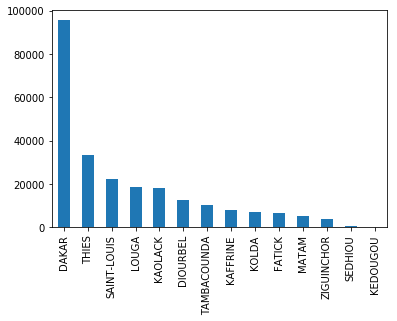

In [6]:
df.REGION.value_counts().plot.bar()

In [7]:
# TENURE

df.TENURE.value_counts()

K > 24 month     379439
I 18-21 month      8312
H 15-18 month      4858
G 12-15 month      2788
J 21-24 month      2325
F 9-12 month       1771
E 6-9 month         359
D 3-6 month         148
Name: TENURE, dtype: int64

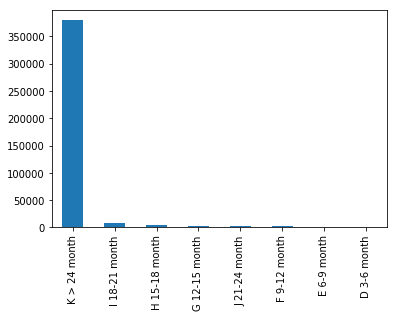

In [8]:
df['TENURE'].value_counts().plot.bar()

## Filling Missing Categorical Features.

In [9]:
for i in cat:
    df[i].fillna(value='NONE', inplace=True)

## Filling Missing Numeric Features.

In [10]:
num = df.select_dtypes(exclude=object)
num.head(3)

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN
0,17000.0,32.0,18000.0,6000.0,34.0,NaN,97.0,355.0,6.0,NaN,NaN,62,35.0,0
1,4300.0,29.0,4427.0,1476.0,37.0,1764.0,8.0,3.0,0.0,NaN,2.0,40,22.0,0
2,1500.0,3.0,1500.0,500.0,3.0,NaN,30.0,30.0,NaN,NaN,NaN,32,3.0,0


In [11]:
for i in num:
    df[i].fillna(value=-999, inplace=True)

## Target Feature.

In [12]:
# CHURN

# distribution of the target variable.
df['CHURN'].value_counts()

0    325156
1     74844
Name: CHURN, dtype: int64

In [13]:
# Percentage of churners in the dataset.

(len(df[df['CHURN']==1]) / len(df['CHURN'])) * 100

18.711

In [14]:
# Percentage of non churners in the dataset.

(len(df[df['CHURN']==0]) / len(df['CHURN'])) * 100

81.289

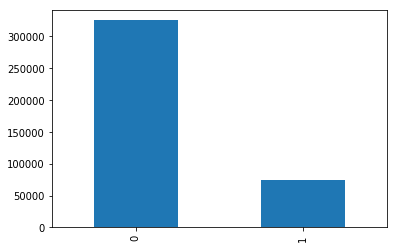

In [15]:
df['CHURN'].value_counts().plot.bar()

In [16]:
# Dropping unwanted columns.

data = df.drop(['user_id', 'MRG', 'TOP_PACK'], axis=1)
data.shape

(400000, 16)

In [17]:
# Split into X and Y.

X = data.drop('CHURN', axis=1)
Y = data['CHURN']

X.shape, Y.shape

((400000, 15), (400000,))

## WOE

In [19]:
# Classing REGION.

X['REGION:NONE'] = np.where((X['REGION'] == 'NONE'), 1, 0)
X['REGION:KEDOUGOU'] = np.where((X['REGION'] == 'KEDOUGOU'), 1, 0)
X['REGION:SEDHIOU'] = np.where((X['REGION'] == 'SEDHIOU'), 1, 0)
X['REGION:DIOURBEL'] = np.where((X['REGION'] == 'DIOURBEL'), 1, 0)
X['REGION:ZIGUINCHOR'] = np.where((X['REGION'] == 'ZIGUINCHOR'), 1, 0)
X['REGION:KAOLACK'] = np.where((X['REGION'] == 'KAOLACK'), 1, 0)
X['REGION:MATAM'] = np.where((X['REGION'] == 'MATAM'), 1, 0)
X['REGION:DAKAR'] = np.where((X['REGION'] == 'DAKAR'), 1, 0)
X['REGION:THIES'] = np.where((X['REGION'] == 'THIES'), 1, 0)
X['REGION:TAMBACOUNDA'] = np.where((X['REGION'] == 'TAMBACOUNDA'), 1, 0)
X['REGION:LOUGA'] = np.where((X['REGION'] == 'LOUGA'), 1, 0)
X['REGION:FATICK'] = np.where((X['REGION'] == 'FATICK'), 1, 0)
X['REGION:SAINT-LOUIS'] = np.where((X['REGION'] == 'SAINT-LOUIS'), 1, 0)
X['REGION:KOLDA'] = np.where((X['REGION'] == 'KOLDA'), 1, 0)
X['REGION:KAFFRINE'] = np.where((X['REGION'] == 'KAFFRINE'), 1, 0)

# NONE is the reference category for this feature (REGION) since it has the lowest/most negative WOE.

In [20]:
# Classing TENURE.

X['TENURE:12-15Months'] = np.where((X['TENURE'] == 'G 12-15 month'), 1, 0)
X['TENURE:15-18Months'] = np.where((X['TENURE'] == 'H 15-18 month'), 1, 0)
X['TENURE:18-21Months'] = np.where((X['TENURE'] == 'I 18-21 month'), 1, 0)
X['TENURE:9-12Months'] = np.where((X['TENURE'] == 'F 9-12 month'), 1, 0)
X['TENURE:21-24Months'] = np.where((X['TENURE'] == 'J 21-24 month'), 1, 0)
X['TENURE:Over 24Months'] = np.where((X['TENURE'] == 'K > 24 month'), 1, 0)
X['TENURE:6-9Months'] = np.where((X['TENURE'] == 'E 6-9 month'), 1, 0)
X['TENURE:3-6Months'] = np.where((X['TENURE'] == 'D 3-6 month'), 1, 0)

# 12-15Months is the refence category for TENURE.

In [21]:
# Coarse Classing MONTANT.

X['MONTANT:Below8200'] = np.where((X['MONTANT'] <= 8100.8), 1, 0)
X['MONTANT:8200-17200'] = np.where((X['MONTANT'] > 8100.8) & (X['MONTANT'] <= 17200.6), 1, 0)
X['MONTANT:17300-26300'] = np.where((X['MONTANT'] > 17200.6) & (X['MONTANT'] <= 26300.4), 1, 0)
X['MONTANT:26400-35400'] = np.where((X['MONTANT'] > 26300.4) & (X['MONTANT'] <= 35400.2), 1, 0)
X['MONTANT:35500-44500'] = np.where((X['MONTANT'] > 35400.2) & (X['MONTANT'] <= 44500.0), 1, 0)
X['MONTANT:Over44500'] = np.where((X['MONTANT'] > 44500), 1, 0)

# Below8200 is the reference category for MONTANT.

In [22]:
# Finally, we can now coarse class FREQUENCE_RECH

X['FREQUENCE_RECH:<1'] = np.where((X['FREQUENCE_RECH'] <= -999.8), 1, 0) # ref_cat.
X['FREQUENCE_RECH:1-11'] = np.where((X['FREQUENCE_RECH'] >= 0.948) & (X['FREQUENCE_RECH'] <= 11.4), 1, 0)
X['FREQUENCE_RECH:12-21'] = np.where((X['FREQUENCE_RECH'] > 11.4) & (X['FREQUENCE_RECH'] <= 21.8), 1, 0)
X['FREQUENCE_RECH:22-32'] = np.where((X['FREQUENCE_RECH'] > 21.8) & (X['FREQUENCE_RECH'] <= 32.2), 1, 0)
X['FREQUENCE_RECH:33-42'] = np.where((X['FREQUENCE_RECH'] > 32.2) & (X['FREQUENCE_RECH'] <= 42.6), 1, 0)
X['FREQUENCE_RECH:43-53'] = np.where((X['FREQUENCE_RECH'] > 42.6) & (X['FREQUENCE_RECH'] <= 53.0), 1, 0)
X['FREQUENCE_RECH:>53'] = np.where((X['FREQUENCE_RECH'] > 53.0), 1, 0)

In [23]:
# REVENUE.

X['REVENUE:Below8400'] = np.where((X['REVENUE'] <= 8372.4), 1, 0) #ref_cat
X['REVENUE:8400-17900'] = np.where((X['REVENUE'] > 8372.4) & (X['REVENUE'] <= 17743.8), 1, 0)
X['REVENUE:18000-36400'] = np.where((X['REVENUE'] > 17743.8) & (X['REVENUE'] <= 36486.6), 1, 0) 
X['REVENUE:36500-46000'] = np.where((X['REVENUE'] > 36486.6) & (X['REVENUE'] <= 45858.0), 1, 0)
X['REVENUE:Over46000'] = np.where((X['REVENUE'] > 45858.0), 1, 0)

In [24]:
# Coarse classing ARPU_SEGMENT.

X['ARPU_SEGMENT:Below2200'] = np.where((X['ARPU_SEGMENT'] <= 2151.8), 1, 0) # ref_cat
X['ARPU_SEGMENT:2200-5300'] = np.where((X['ARPU_SEGMENT'] > 2151.8) & (X['ARPU_SEGMENT'] <= 5302.6), 1, 0)
X['ARPU_SEGMENT:5400-11600'] = np.where((X['ARPU_SEGMENT'] > 5302.6) & (X['ARPU_SEGMENT'] <= 11604.2), 1, 0)
X['ARPU_SEGMENT:11700-14700'] = np.where((X['ARPU_SEGMENT'] > 11604.2) & (X['ARPU_SEGMENT'] <= 14755.0), 1, 0)
X['ARPU_SEGMENT:Over14700'] = np.where((X['ARPU_SEGMENT'] > 14755.0), 1, 0)

In [25]:
# Coarse classing FREQUENCE.

X['FREQUENCE:<1'] = np.where((X['FREQUENCE'] <= -781.0), 1, 0) # ref_cat.
X['FREQUENCE:1-19'] = np.where((X['FREQUENCE'] >= 0.91) & (X['FREQUENCE'] <= 19.0), 1, 0)
X['FREQUENCE:20-37'] = np.where((X['FREQUENCE'] > 19.0) & (X['FREQUENCE'] <= 37.0), 1, 0) # Try 20-55
X['FREQUENCE:38-55'] = np.where((X['FREQUENCE'] > 37.0) & (X['FREQUENCE'] <= 55.0), 1, 0)
X['FREQUENCE:56-91'] = np.where((X['FREQUENCE'] > 55.0) & (X['FREQUENCE'] <= 91.0), 1, 0)
X['FREQUENCE:>91'] = np.where((X['FREQUENCE'] > 91.0), 1, 0)

In [26]:
# Coarse classing 'DATA_VOLUME'

X['DATA_VOLUME:<1200'] = np.where((X['DATA_VOLUME'] <= 1136.2), 1, 0) # ref_cat
X['DATA_VOLUME:1200-3200'] = np.where((X['DATA_VOLUME'] > 1136.2) & (X['DATA_VOLUME'] <= 3271.4), 1, 0)
X['DATA_VOLUME:3300-5400'] = np.where((X['DATA_VOLUME'] > 3271.4) & (X['DATA_VOLUME'] <= 5406.6), 1, 0)
X['DATA_VOLUME:5500-7500'] = np.where((X['DATA_VOLUME'] > 5406.6) & (X['DATA_VOLUME'] <= 7541.8), 1, 0)
X['DATA_VOLUME:7600-9600'] = np.where((X['DATA_VOLUME'] > 7541.8) & (X['DATA_VOLUME'] <= 9677.0), 1, 0)
X['DATA_VOLUME:>9600'] = np.where((X['DATA_VOLUME']), 1, 0)

In [27]:
# Coarse classing 'ON_NET'.

X['ON_NET:<1'] = np.where((X['ON_NET'] <= -276.3), 1, 0) # ref_cat.
X['ON_NET:1-400'] = np.where((X['ON_NET'] > -276.3) & (X['ON_NET'] <= 446.4), 1, 0)
X['ON_NET:450-2600'] = np.where((X['ON_NET'] > 446.4) & (X['ON_NET'] <= 2614.5), 1, 0)
X['ON_NET:2700-4000'] = np.where((X['ON_NET'] > 2614.5) & (X['ON_NET'] <= 4059.9), 1, 0)
X['ON_NET:4100-6200'] = np.where((X['ON_NET'] > 4059.9) & (X['ON_NET'] <= 6228.0), 1, 0)
X['ON_NET:>6200'] = np.where((X['ON_NET'] > 6228.0), 1, 0)

In [28]:
# Coarse classing ORANGE.

X['ORANGE:<1'] = np.where((X['ORANGE'] <= -443.0), 1, 0) # ref_cat
X['ORANGE:1-100'] = np.where((X['ORANGE'] > -443.0) & (X['ORANGE'] <= 113.0), 1, 0)
X['ORANGE:120-1700'] = np.where((X['ORANGE'] > 113.0) & (X['ORANGE'] <= 1781.0), 1, 0)
X['ORANGE:1800-2800'] = np.where((X['ORANGE'] > 1781.0) & (X['ORANGE'] <= 2893.0), 1, 0)
X['ORANGE:>2800'] = np.where((X['ORANGE'] > 2893.0), 1, 0)

In [29]:
# Coarse classing TIGO.

X['TIGO:<1'] = np.where((X['TIGO'] <= -998.8), 1, 0) # ref_cat as it reps missing values.
X['TIGO:1-25'] = np.where((X['TIGO'] > -998.8) & (X['TIGO'] <= 25.6), 1, 0)
X['TIGO:26-51'] = np.where((X['TIGO'] > 25.6) & (X['TIGO'] <= 51.2), 1, 0)
X['TIGO:52-102'] = np.where((X['TIGO'] > 51.2) & (X['TIGO'] <= 102.4), 1, 0)
X['TIGO:103-128'] = np.where((X['TIGO'] > 102.4) & (X['TIGO'] <= 128.0), 1, 0)
X['TIGO:>128'] = np.where((X['TIGO'] > 128.0), 1, 0)

In [30]:
# Coarse classing 'ZONE1'

X['ZONE1:<1'] = np.where((X['ZONE1'] <= -733.4), 1, 0)
X['ZONE1:1-13'] = np.where((X['ZONE1'] > -733.4) & (X['ZONE1'] <= 13.2), 1, 0) # ref_cat since it is the only class with positive WOE.
X['ZONE1:14-39'] = np.where((X['ZONE1'] > 13.2) & (X['ZONE1'] <= 39.6), 1, 0)
X['ZONE1:40-52'] = np.where((X['ZONE1'] > 39.6) & (X['ZONE1'] <= 52.8), 1, 0)
X['ZONE1:53-66'] = np.where((X['ZONE1'] > 52.8) & (X['ZONE1'] <= 66.0), 1, 0)
X['ZONE1:>66'] = np.where((X['ZONE1'] > 66.0), 1, 0)

In [31]:
# Coarse classing ZONE2.

X['ZONE2:<1'] = np.where((X['ZONE2'] <= -597.0), 1, 0)
X['ZONE2:1-117'] = np.where((X['ZONE2'] > -597.0) & (X['ZONE2'] <= 117.6), 1, 0) # ref_cat since it's the only class with +ve WOE
X['ZONE2:118-352'] = np.where((X['ZONE2'] > 117.6) & (X['ZONE2'] <= 352.8), 1, 0)
X['ZONE2:353-588'] = np.where((X['ZONE2'] > 352.8) & (X['ZONE2'] <= 588.0), 1, 0)
X['ZONE2:>588'] = np.where((X['ZONE2'] > 588.0), 1, 0)

In [32]:
# Coarse Classing 'REGULARITY'.

X['REGULARITY:<14'] = np.where((X['REGULARITY'] <= 13.2), 1, 0) # ref_cat
X['REGULARITY:14-25'] = np.where((X['REGULARITY'] > 13.2) & (X['REGULARITY'] <= 25.4), 1, 0)
X['REGULARITY:26-37'] = np.where((X['REGULARITY'] > 25.4) & (X['REGULARITY'] <= 37.6), 1, 0)
X['REGULARITY:38-62'] = np.where((X['REGULARITY'] > 37.6) & (X['REGULARITY'] <= 62.0), 1, 0)
X['REGULARITY:>62'] = np.where((X['REGULARITY'] > 62.0), 1, 0)

In [33]:
# Coarse classing 'FREQ_TOP_PACK'.

X['FREQ_TOP_PACK:<1'] = np.where((X['FREQ_TOP_PACK'] <= -673.4), 1, 0) # ref_cat (most -ve WOE and missing values)
X['FREQ_TOP_PACK:1-26'] = np.where((X['FREQ_TOP_PACK'] > -673.4) & (X['FREQ_TOP_PACK'] <= 26.0), 1, 0)
X['FREQ_TOP_PACK:27-51'] = np.where((X['FREQ_TOP_PACK'] > 26.0) & (X['FREQ_TOP_PACK'] <= 51.0), 1, 0)
X['FREQ_TOP_PACK:52-76'] = np.where((X['FREQ_TOP_PACK'] > 51.0) & (X['FREQ_TOP_PACK'] <= 76.0), 1, 0)
X['FREQ_TOP_PACK:77-126'] = np.where((X['FREQ_TOP_PACK'] > 76.0) & (X['FREQ_TOP_PACK'] <= 126.0), 1, 0)
X['FREQ_TOP_PACK:>126'] = np.where((X['FREQ_TOP_PACK'] > 126.0), 1, 0)

In [34]:
# Reference Category.

ref_cat = ['REGION:NONE', 'TENURE:12-15Months', 'MONTANT:Below8200', 'FREQUENCE_RECH:<1', 'REVENUE:Below8400', 
           'ARPU_SEGMENT:Below2200', 'FREQUENCE:<1', 'DATA_VOLUME:<1200', 'ON_NET:<1', 'ORANGE:<1', 'TIGO:<1', 'ZONE1:1-13', 
           'ZONE2:1-117', 'REGULARITY:<14', 'FREQ_TOP_PACK:<1']


In [35]:
pd.options.display.max_columns=None
X.head()

,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,REGION:NONE,REGION:KEDOUGOU,REGION:SEDHIOU,REGION:DIOURBEL,REGION:ZIGUINCHOR,REGION:KAOLACK,REGION:MATAM,REGION:DAKAR,REGION:THIES,REGION:TAMBACOUNDA,REGION:LOUGA,REGION:FATICK,REGION:SAINT-LOUIS,REGION:KOLDA,REGION:KAFFRINE,TENURE:12-15Months,TENURE:15-18Months,TENURE:18-21Months,TENURE:9-12Months,TENURE:21-24Months,TENURE:Over 24Months,TENURE:6-9Months,TENURE:3-6Months,MONTANT:Below8200,MONTANT:8200-17200,MONTANT:17300-26300,MONTANT:26400-35400,MONTANT:35500-44500,MONTANT:Over44500,FREQUENCE_RECH:<1,FREQUENCE_RECH:1-11,FREQUENCE_RECH:12-21,FREQUENCE_RECH:22-32,FREQUENCE_RECH:33-42,FREQUENCE_RECH:43-53,FREQUENCE_RECH:>53,REVENUE:Below8400,REVENUE:8400-17900,REVENUE:18000-36400,REVENUE:36500-46000,REVENUE:Over46000,ARPU_SEGMENT:Below2200,ARPU_SEGMENT:2200-5300,ARPU_SEGMENT:5400-11600,ARPU_SEGMENT:11700-14700,ARPU_SEGMENT:Over14700,FREQUENCE:<1,FREQUENCE:1-19,FREQUENCE:20-37,FREQUENCE:38-55,FREQUENCE:56-91,FREQUENCE:>91,DATA_VOLUME:<1200,DATA_VOLUME:1200-3200,DATA_VOLUME:3300-5400,DATA_VOLUME:5500-7500,DATA_VOLUME:7600-9600,DATA_VOLUME:>9600,ON_NET:<1,ON_NET:1-400,ON_NET:450-2600,ON_NET:2700-4000,ON_NET:4100-6200,ON_NET:>6200,ORANGE:<1,ORANGE:1-100,ORANGE:120-1700,ORANGE:1800-2800,ORANGE:>2800,TIGO:<1,TIGO:1-25,TIGO:26-51,TIGO:52-102,TIGO:103-128,TIGO:>128,ZONE1:<1,ZONE1:1-13,ZONE1:14-39,ZONE1:40-52,ZONE1:53-66,ZONE1:>66,ZONE2:<1,ZONE2:1-117,ZONE2:118-352,ZONE2:353-588,ZONE2:>588,REGULARITY:<14,REGULARITY:14-25,REGULARITY:26-37,REGULARITY:38-62,REGULARITY:>62,FREQ_TOP_PACK:<1,FREQ_TOP_PACK:1-26,FREQ_TOP_PACK:27-51,FREQ_TOP_PACK:52-76,FREQ_TOP_PACK:77-126,FREQ_TOP_PACK:>126
0,SAINT-LOUIS,K > 24 month,17000.0,32.0,18000.0,6000.0,34.0,-999.0,97.0,355.0,6.0,-999.0,-999.0,62,35.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
1,NONE,K > 24 month,4300.0,29.0,4427.0,1476.0,37.0,1764.0,8.0,3.0,0.0,-999.0,2.0,40,22.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0
2,TAMBACOUNDA,K > 24 month,1500.0,3.0,1500.0,500.0,3.0,-999.0,30.0,30.0,-999.0,-999.0,-999.0,32,3.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,FATICK,K > 24 month,1500.0,3.0,2497.0,832.0,4.0,0.0,159.0,45.0,19.0,-999.0,-999.0,18,3.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4,FATICK,K > 24 month,-999.0,-999.0,498.0,166.0,3.0,1.0,1.0,3.0,-999.0,-999.0,-999.0,50,-999.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0


In [36]:
X.shape

(400000, 112)

In [38]:
# Remove unwanted columns (including parent features/columns).

col = ['REGION', 'TENURE', 'MONTANT', 'FREQUENCE_RECH', 'REVENUE', 'ARPU_SEGMENT', 'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 
       'ORANGE', 'TIGO', 'ZONE1', 'ZONE2', 'REGULARITY', 'FREQ_TOP_PACK']

X = X.drop(col, axis=1)

# Size of X
X.shape

(400000, 97)

In [39]:
# Removing ref_categories to eliminate possible multicollinearity.

X = X.drop(ref_cat, axis=1)
X.shape

(400000, 82)

In [40]:
# Splitting into train and test sets.
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=12)

# Shape of train sets.
x_train.shape, y_train.shape

((320000, 82), (320000,))

In [41]:
# Shape of test sets.
x_test.shape, y_test.shape

((80000, 82), (80000,))

In [42]:
# Logistic Regression.
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression(random_state=12)
reg.fit(x_train, y_train)

C:\Users\JAHFAITH IROKANULO\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(random_state=12)

In [50]:
# Prediction.

y_proba = reg.predict_proba(x_test)
y_proba

array([[0.36263448, 0.63736552],
       [0.36263448, 0.63736552],
       [0.36263448, 0.63736552],
       ...,
       [0.98702422, 0.01297578],
       [0.99738949, 0.00261051],
       [0.98972777, 0.01027223]])

In [52]:
y_pred = reg.predict(x_test)
y_pred

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [51]:
# Using just the Probability of non-churners. That is, 0.

pnc = y_proba[:][:, 0]
pnc

array([0.36263448, 0.36263448, 0.36263448, ..., 0.98702422, 0.99738949,
       0.98972777])

In [45]:
y_test.reset_index(drop=True, inplace=True)

In [46]:
# Comparing predicted outcome with actual values.

pred = pd.concat([y_test, pd.DataFrame(pnc)], axis=1)
pred.columns = ['y_test', 'PNC']

In [47]:
pred.head()

,y_test,PNC
0,1,0.362634
1,1,0.362634
2,1,0.362634
3,0,0.405366
4,0,0.997377


## Model Evaluation.

In [48]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score

In [53]:
acc = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
gini = 2 * (auc) - 1

In [54]:
print('Accuracy: {:.2f}'.format(acc))
print('AUC: {:.2f}'.format(auc))
print('Gini Coefficient: {:.2f}'.format(gini))

Accuracy: 0.87
AUC: 0.83
Gini Coefficient: 0.66


In [55]:
from sklearn.metrics import f1_score, precision_score, recall_score

F1 = f1_score(y_test, y_pred)
con_mat = confusion_matrix(y_test, y_pred)

In [58]:
print('F1: {:.2f}'.format(F1))
print('')
print('Cost Matrix:\n', con_mat)

F1: 0.68

Cost Matrix:
 [[58309  6877]
 [ 3540 11274]]


In [59]:
# ROC Curve.
# fallout (false positive rate) and sensitivity (true positive rate).
from sklearn.metrics import roc_curve

fpr, tpr, threshold = roc_curve(y_test, y_pred)

Text(0.5,1,'ROC Curve')

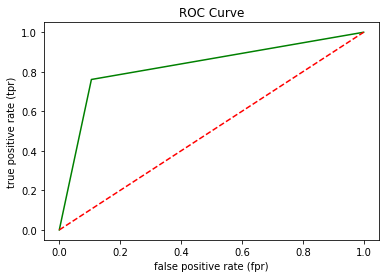

In [60]:
# Plotting the ROC Curve.

plt.plot(fpr, tpr, color='green')
plt.plot(fpr, fpr, color='red', linestyle='--')
plt.xlabel('false positive rate (fpr)')
plt.ylabel('true positive rate (tpr)')

plt.title('ROC Curve')

## Scorecard.

In [61]:
# Model Coefficients
coef = reg.coef_

# Model Intercept.
inter = reg.intercept_

In [62]:
# Features, intercept and coefficients.

table = pd.DataFrame(x_train.columns.values, columns=['Features'])
table['Coefficient'] = np.transpose(coef)
table.index = table.index + 1 # adding an additional space to house the intercept.
# including the intercept to the table.
table.loc[0] = ['Intercept', inter[0]]

table = table.sort_index()
table

,Features,Coefficient
0,Intercept,1.006839
1,REGION:KEDOUGOU,-1.558728
2,REGION:SEDHIOU,-2.447159
3,REGION:DIOURBEL,-2.599738
4,REGION:ZIGUINCHOR,-2.488183
...,...,...
78,FREQ_TOP_PACK:1-26,-0.036173
79,FREQ_TOP_PACK:27-51,0.071502
80,FREQ_TOP_PACK:52-76,-0.034296
81,FREQ_TOP_PACK:77-126,0.288871


In [63]:
# Reference Categories.

ref_table = pd.DataFrame(ref_cat, columns=['Features'])
ref_table['Coefficient'] = 0

ref_table

,Features,Coefficient
0,REGION:NONE,0
1,TENURE:12-15Months,0
2,MONTANT:Below8200,0
3,FREQUENCE_RECH:<1,0
4,REVENUE:Below8400,0
5,ARPU_SEGMENT:Below2200,0
6,FREQUENCE:<1,0
7,DATA_VOLUME:<1200,0
8,ON_NET:<1,0
9,ORANGE:<1,0


In [65]:
# Merging The two tables (table and ref_table).

Scorecard = pd.concat([table, ref_table], axis=0)

pd.set_option('display.max_rows', None)
Scorecard

,Features,Coefficient
0,Intercept,1.006839
1,REGION:KEDOUGOU,-1.558728
2,REGION:SEDHIOU,-2.447159
3,REGION:DIOURBEL,-2.599738
4,REGION:ZIGUINCHOR,-2.488183
5,REGION:KAOLACK,-2.399670
6,REGION:MATAM,-2.449990
7,REGION:DAKAR,-2.564630
8,REGION:THIES,-2.762019
9,REGION:TAMBACOUNDA,-2.541659


In [66]:
# Base Features.

Scorecard['Base Features'] = Scorecard['Features'].str.split(':').str[0]
Scorecard

,Features,Coefficient,Base Features
0,Intercept,1.006839,Intercept
1,REGION:KEDOUGOU,-1.558728,REGION
2,REGION:SEDHIOU,-2.447159,REGION
3,REGION:DIOURBEL,-2.599738,REGION
4,REGION:ZIGUINCHOR,-2.488183,REGION
5,REGION:KAOLACK,-2.399670,REGION
6,REGION:MATAM,-2.449990,REGION
7,REGION:DAKAR,-2.564630,REGION
8,REGION:THIES,-2.762019,REGION
9,REGION:TAMBACOUNDA,-2.541659,REGION


In [67]:
Scorecard = Scorecard.reset_index()

In [68]:
# Setting Min and Max Scores.

min_score = 300
max_score = 850

In [70]:
# Sum of the minimums.

min_sum = Scorecard.groupby('Base Features')['Coefficient'].min().sum()
min_sum

-8.802180313439871

In [71]:
# Sum of the maximums.

max_sum = Scorecard.groupby('Base Features')['Coefficient'].max().sum()
max_sum

4.200375720579961

In [72]:
Scorecard['Score'] = Scorecard['Coefficient'] * (max_score - min_score) / (max_sum - min_sum)
Scorecard

,index,Features,Coefficient,Base Features,Score
0,0,Intercept,1.006839,Intercept,42.588667
1,1,REGION:KEDOUGOU,-1.558728,REGION,-65.933209
2,2,REGION:SEDHIOU,-2.447159,REGION,-103.513279
3,3,REGION:DIOURBEL,-2.599738,REGION,-109.967294
4,4,REGION:ZIGUINCHOR,-2.488183,REGION,-105.248569
5,5,REGION:KAOLACK,-2.399670,REGION,-101.504562
6,6,REGION:MATAM,-2.449990,REGION,-103.633058
7,7,REGION:DAKAR,-2.564630,REGION,-108.482228
8,8,REGION:THIES,-2.762019,REGION,-116.831667
9,9,REGION:TAMBACOUNDA,-2.541659,REGION,-107.510590


In [73]:
min_score_sum = Scorecard.groupby('Base Features')['Score'].min().sum()
max_score_sum = Scorecard.groupby('Base Features')['Score'].max().sum()

In [74]:
# Scaling the scores to be between 300 and 850.

Scorecard['Score'][0] = ((Scorecard['Coefficient'][0] - min_sum) / (max_sum - min_sum)) * (max_score - min_score) + min_score
Scorecard

C:\Users\JAHFAITH IROKANULO\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,index,Features,Coefficient,Base Features,Score
0,0,Intercept,1.006839,Intercept,714.915397
1,1,REGION:KEDOUGOU,-1.558728,REGION,-65.933209
2,2,REGION:SEDHIOU,-2.447159,REGION,-103.513279
3,3,REGION:DIOURBEL,-2.599738,REGION,-109.967294
4,4,REGION:ZIGUINCHOR,-2.488183,REGION,-105.248569
5,5,REGION:KAOLACK,-2.399670,REGION,-101.504562
6,6,REGION:MATAM,-2.449990,REGION,-103.633058
7,7,REGION:DAKAR,-2.564630,REGION,-108.482228
8,8,REGION:THIES,-2.762019,REGION,-116.831667
9,9,REGION:TAMBACOUNDA,-2.541659,REGION,-107.510590


In [75]:
# Rounding up the scores.

rounded_score = np.round(Scorecard['Score'])
Scorecard['Rounded Score'] = rounded_score

Scorecard

,index,Features,Coefficient,Base Features,Score,Rounded Score
0,0,Intercept,1.006839,Intercept,714.915397,715.0
1,1,REGION:KEDOUGOU,-1.558728,REGION,-65.933209,-66.0
2,2,REGION:SEDHIOU,-2.447159,REGION,-103.513279,-104.0
3,3,REGION:DIOURBEL,-2.599738,REGION,-109.967294,-110.0
4,4,REGION:ZIGUINCHOR,-2.488183,REGION,-105.248569,-105.0
5,5,REGION:KAOLACK,-2.399670,REGION,-101.504562,-102.0
6,6,REGION:MATAM,-2.449990,REGION,-103.633058,-104.0
7,7,REGION:DAKAR,-2.564630,REGION,-108.482228,-108.0
8,8,REGION:THIES,-2.762019,REGION,-116.831667,-117.0
9,9,REGION:TAMBACOUNDA,-2.541659,REGION,-107.510590,-108.0
